This is a sample code for producing chart 4.4, 4.5 and dynamic maps 

- Chart 4.4: is a static map displaying the geographical distribution of global Agbio patents and scientific publications.  
- Chart 4.5: is a static map displaying the geographical distribution of global Agbio innovation clusters.
- Dynamic maps: It generate an interactive maps displaying the evoluton of global agbio clusters during past two decades.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import os
curdir = os.getcwd()
print(curdir)

# warning off 
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, Markdown, Latex

basep = pd.read_csv('base_parameters.csv',index_col=['name'])
case=basep.loc['case'][0]
case_short=basep.loc['case_short'][0]
display(Markdown('# '+ case + ' ('+case_short+')'))
basep.head()

C:\Users\Yin_d\Dropbox\WIPO_Shared\Chapter_2\Agbio\crops\Indicators


# Agrbio Crops (Crops)

myvalue
name                               
case                   Agrbio Crops
case_short                    Crops
max_year                       2016
pat                         Patents
wos         Scientific Publications

In [2]:
def save_data_charts(file_dir,file_name,data,plt):
    if not os.path.exists(file_dir):
        os.mkdir(file_dir)

    data.to_csv(file_dir+file_name+'_table.csv',index=True)
    plt.savefig(file_dir+file_name+'.png', bbox_inches='tight',dpi=1000)  
    plt.savefig(file_dir+file_name+'.pdf', dpi=1000)  
    plt.savefig(file_dir+file_name+'.svg', dpi=1000)
    print("saved as: ", file_dir+file_name+'.png')

# Data Processing

In [3]:
# Load global patenting data 

agbio_pat=pd.read_stata('../clusters/agbio_famid_crop_geo_v2.dta')

agbio_pat['year_dmy']=pd.cut(agbio_pat['year'], bins=[1998,2007,2017], 
                             include_lowest=True, labels=['1998-2007','2008-2017'])
agbio_pat = agbio_pat[agbio_pat.year_dmy.isna()==0]

agbio_pat=agbio_pat.groupby(['addr_id','lat','lng','year_dmy'],observed=True)['fam_id'].nunique().reset_index()
agbio_pat.rename(columns={'fam_id':'num_points'},inplace=True)
agbio_pat=agbio_pat[['addr_id', 'lat', 'lng', 'year_dmy','num_points']]
agbio_pat.drop_duplicates(inplace=True)
agbio_pat.head()

addr_id        lat         lng   year_dmy  num_points
0       59 -45.907211  170.487183  1998-2007           2
1       62 -45.903599  170.496002  1998-2007           1
2       73 -45.895680  170.399246  1998-2007           1
3       93 -45.884541  170.531525  1998-2007           1
4      116 -45.878799  170.503006  1998-2007           2

In [ ]:
# Load global data for scientific publications 
agbio_wos=pd.read_stata('../clusters/agbio_id_crop_geo.dta')

agbio_wos['year_dmy']=pd.cut(agbio_wos['year'], bins=[1998,2007,2017], 
                             include_lowest=True, labels=['1998-2007','2008-2017'])
agbio_wos = agbio_wos[agbio_wos.year_dmy.isna()==0]

agbio_wos=agbio_wos.groupby(['latitude','longitude','year_dmy'])['id'].count().reset_index()
agbio_wos.rename(columns={'id':'num_points'},inplace=True)
agbio_wos=agbio_wos[['latitude', 'longitude', 'year_dmy','num_points']]
agbio_wos.rename(columns={'latitude':'lat','longitude':'lng'},inplace=True)
agbio_wos.drop_duplicates(inplace=True)
agbio_wos.head()

In [ ]:
# Combine two databases 
agbio_wos['pat_wos'] = 'wos'
agbio_pat['pat_wos'] = 'pat'
print(agbio_pat.shape,agbio_wos.shape)
agbio = pd.concat([agbio_wos,agbio_pat])

# Save data here 
agbio.to_stata('charts/chart 4.4/chart4.4_agbio.dta',write_index=False)
print(agbio.shape)
agbio.head()

# Charts 4.4 (Static)

Chart 4.4 is a static map displaying the geographical distribution of global Agbio patents and scientific publications.  

## Data

In [3]:
agbio=pd.read_stata('charts//chart 4.4/chart4.4_agbio.dta')
print(agbio.shape)
agbio.head()

(96408, 6)


lat         lng   year_dmy  num_points pat_wos  addr_id
0 -54.799999  -68.300003  2008-2012           1     wos      NaN
1 -54.799999  -68.300003  2013-2017           2     wos      NaN
2 -51.622608  -69.218132  2008-2012           1     wos      NaN
3 -51.622608  -69.218132  2013-2017           1     wos      NaN
4 -45.878399  170.520096  2013-2017           1     wos      NaN

## Static maps

saved as:  charts/chart 4.4/chart4.4_crops_2008-2012.png
2008-2012 is finished
saved as:  charts/chart 4.4/chart4.4_crops_2013-2017.png
2013-2017 is finished
saved as:  charts/chart 4.4/chart4.4_crops_1998-2002.png
1998-2002 is finished
saved as:  charts/chart 4.4/chart4.4_crops_2003-2007.png
2003-2007 is finished


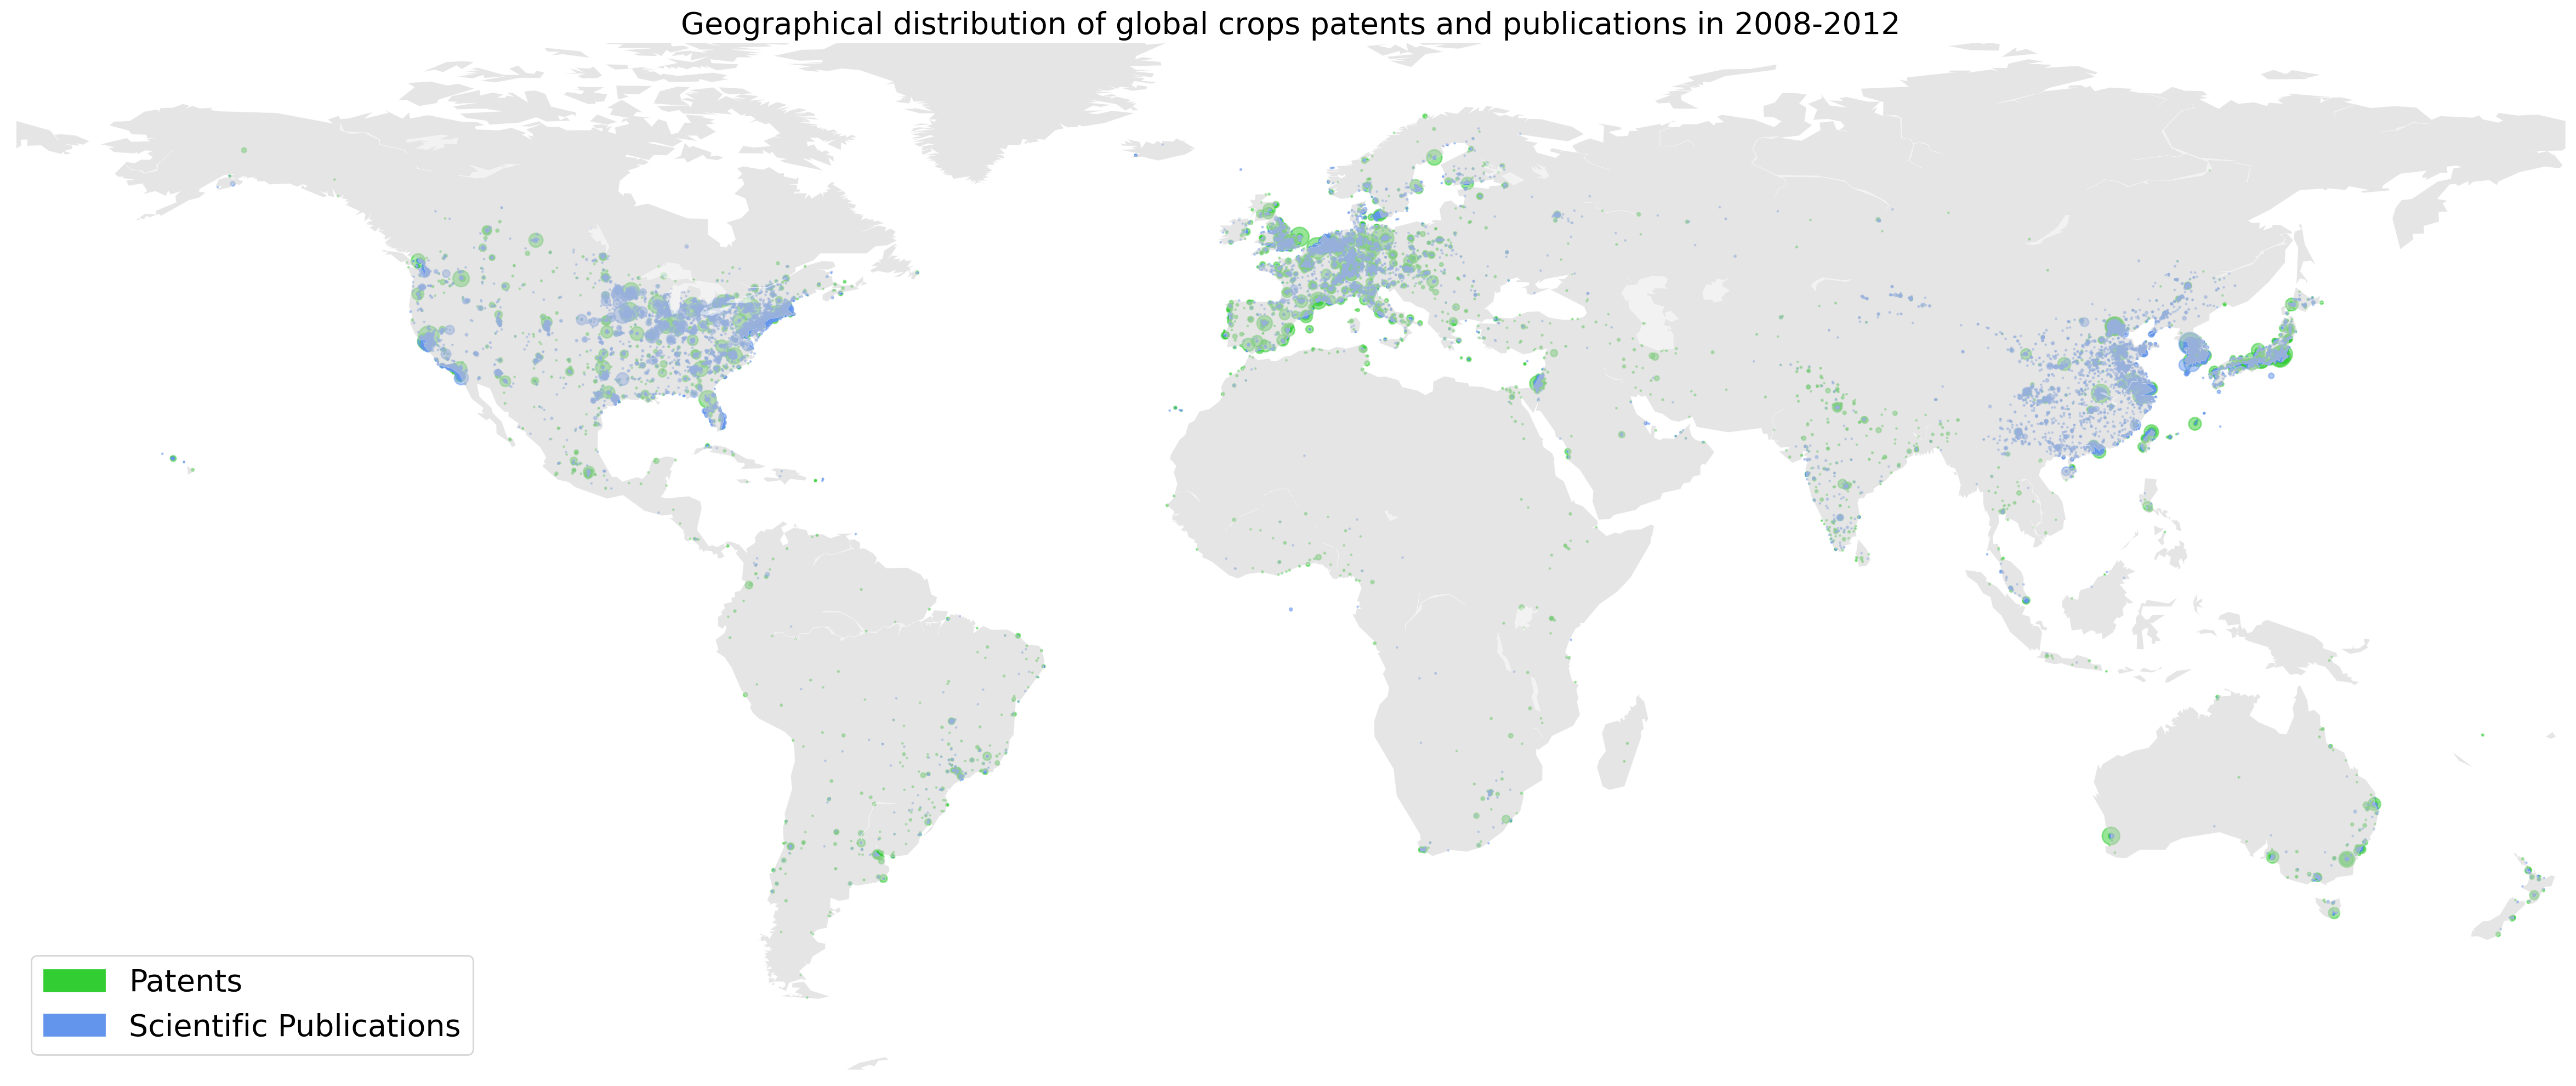

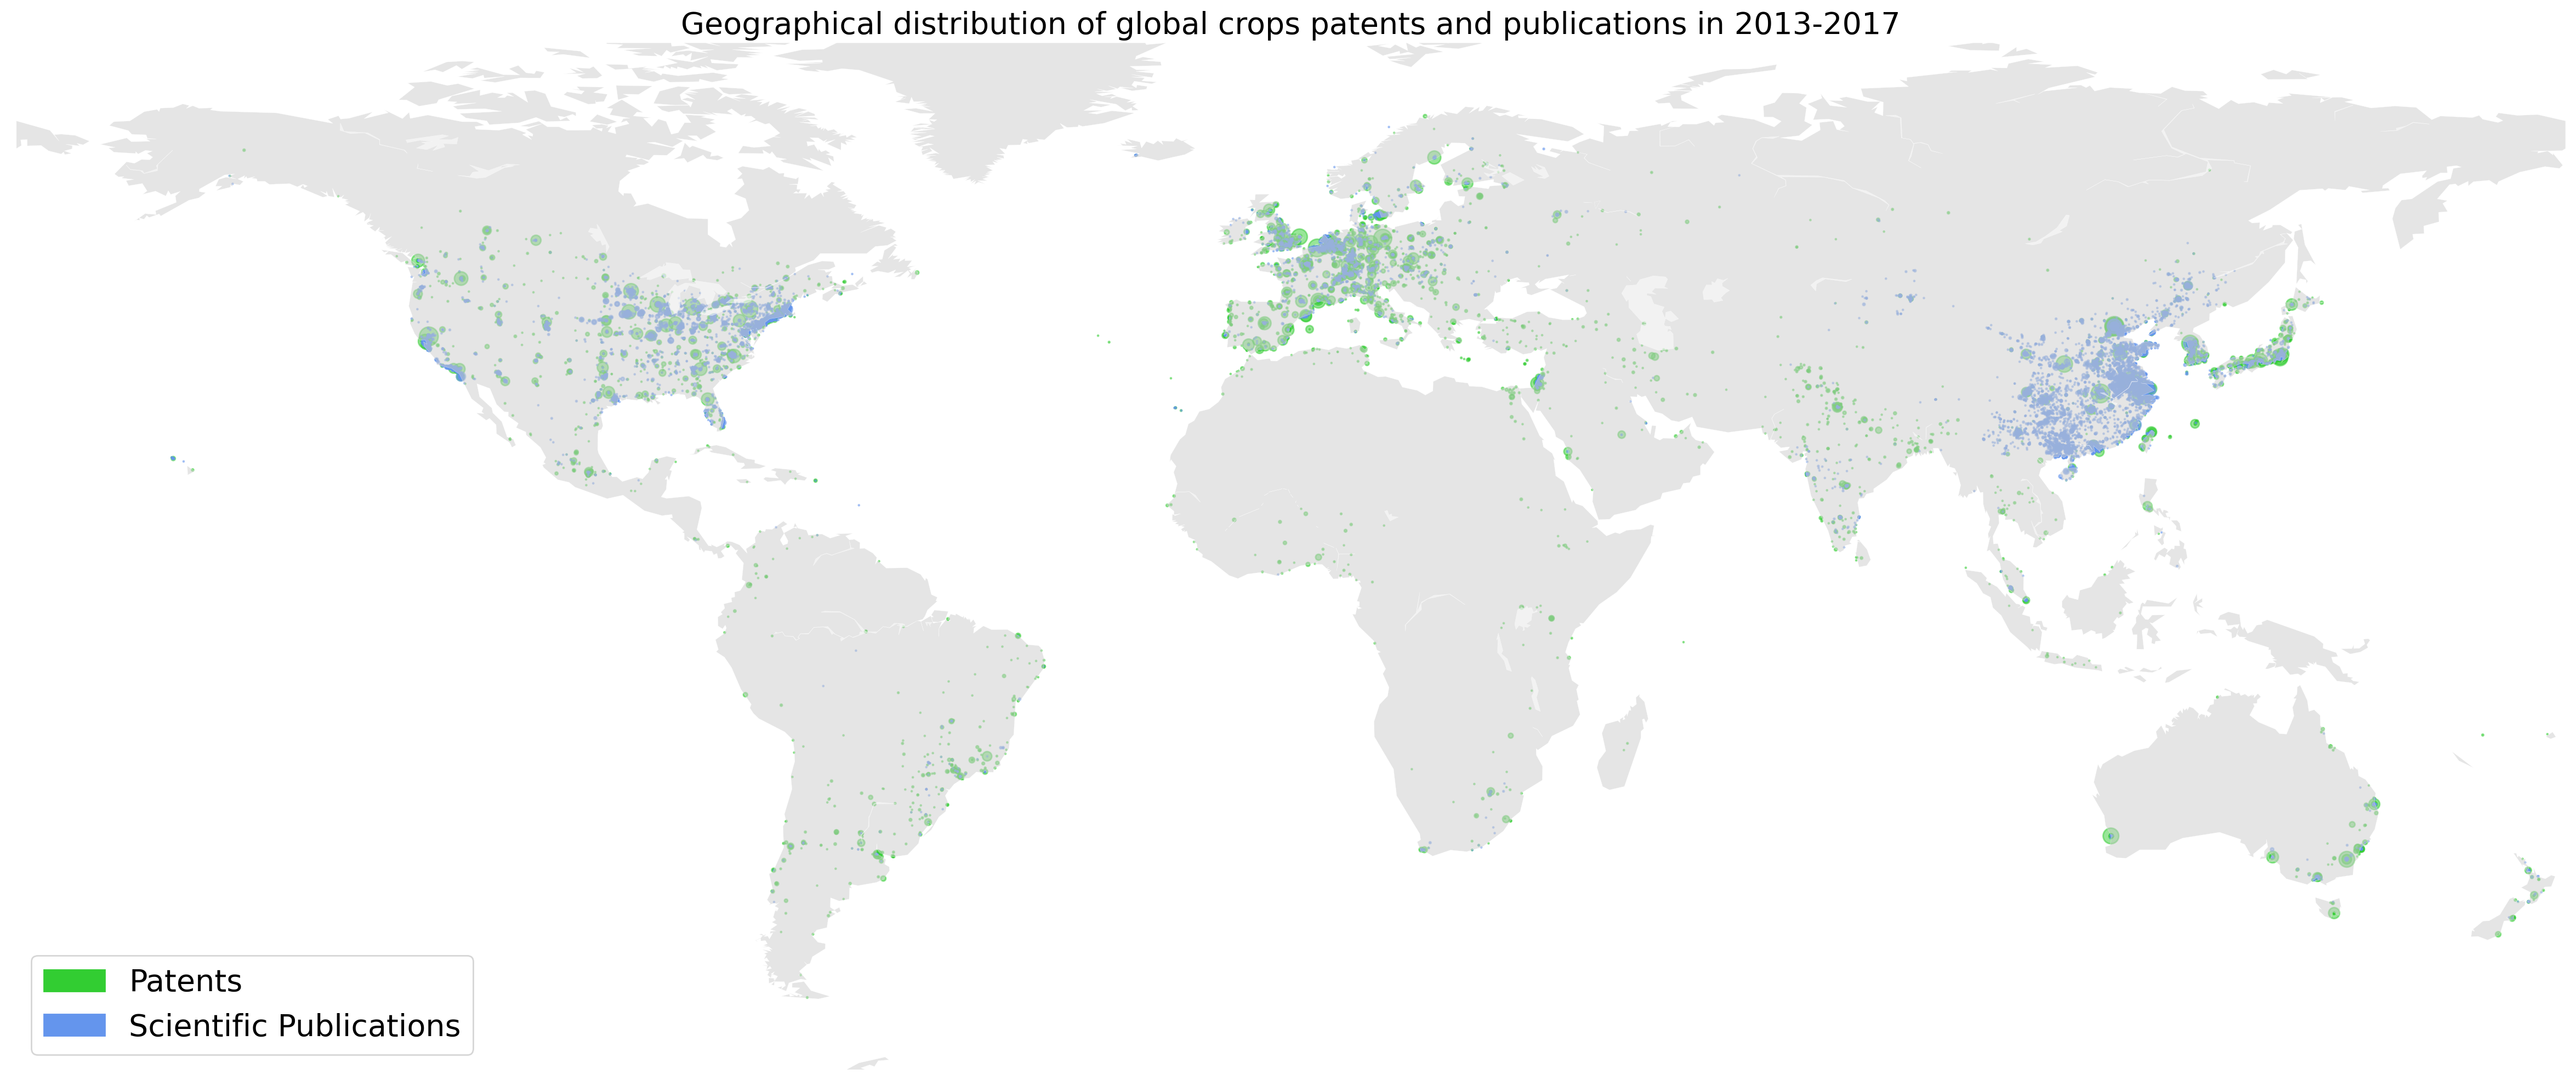

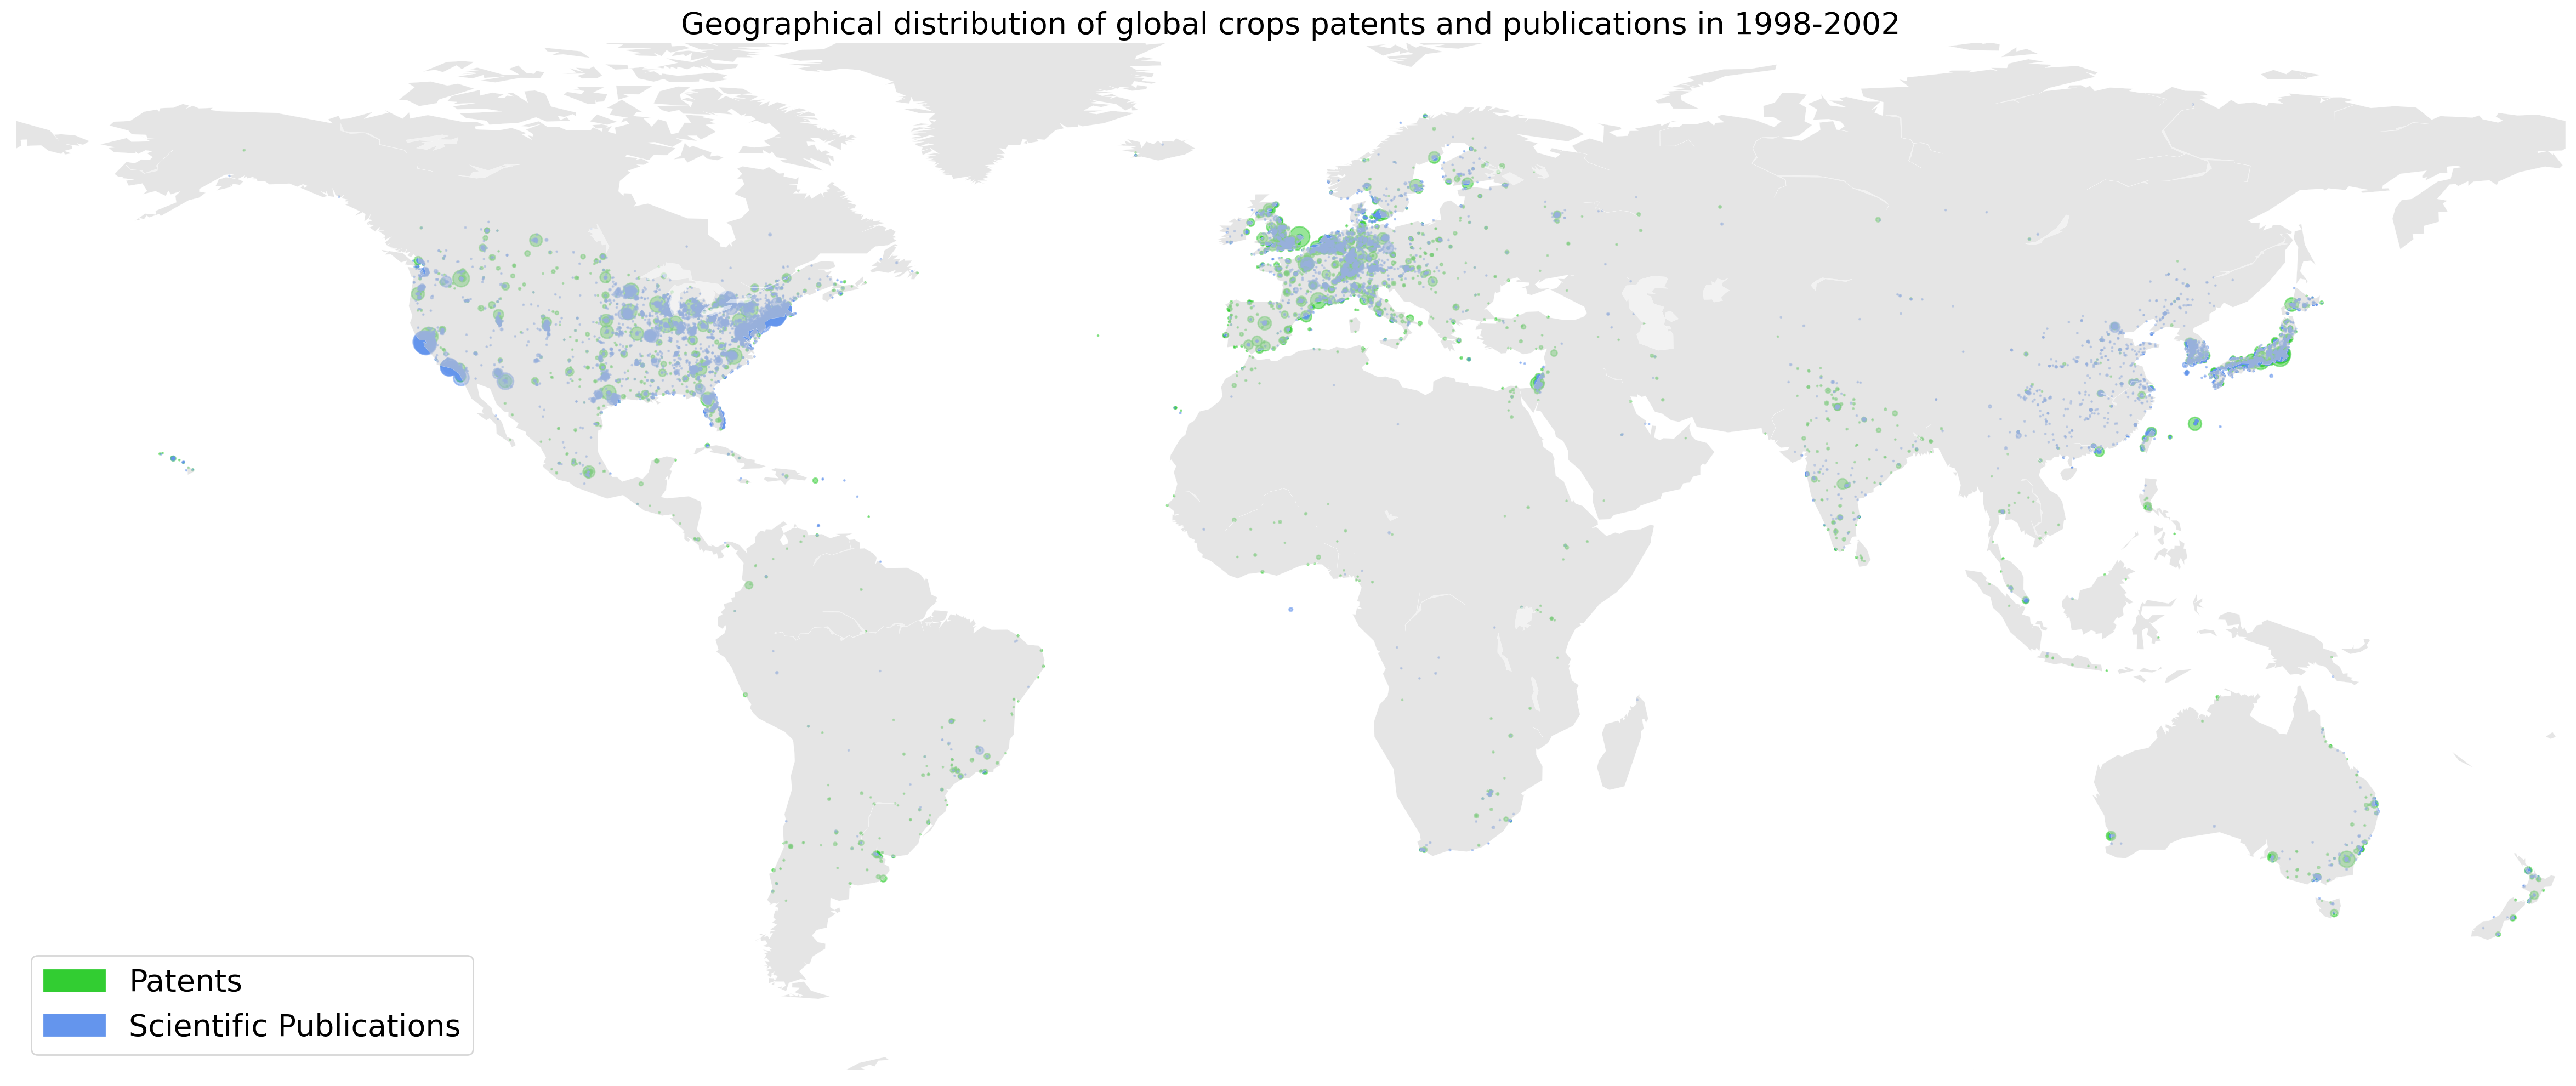

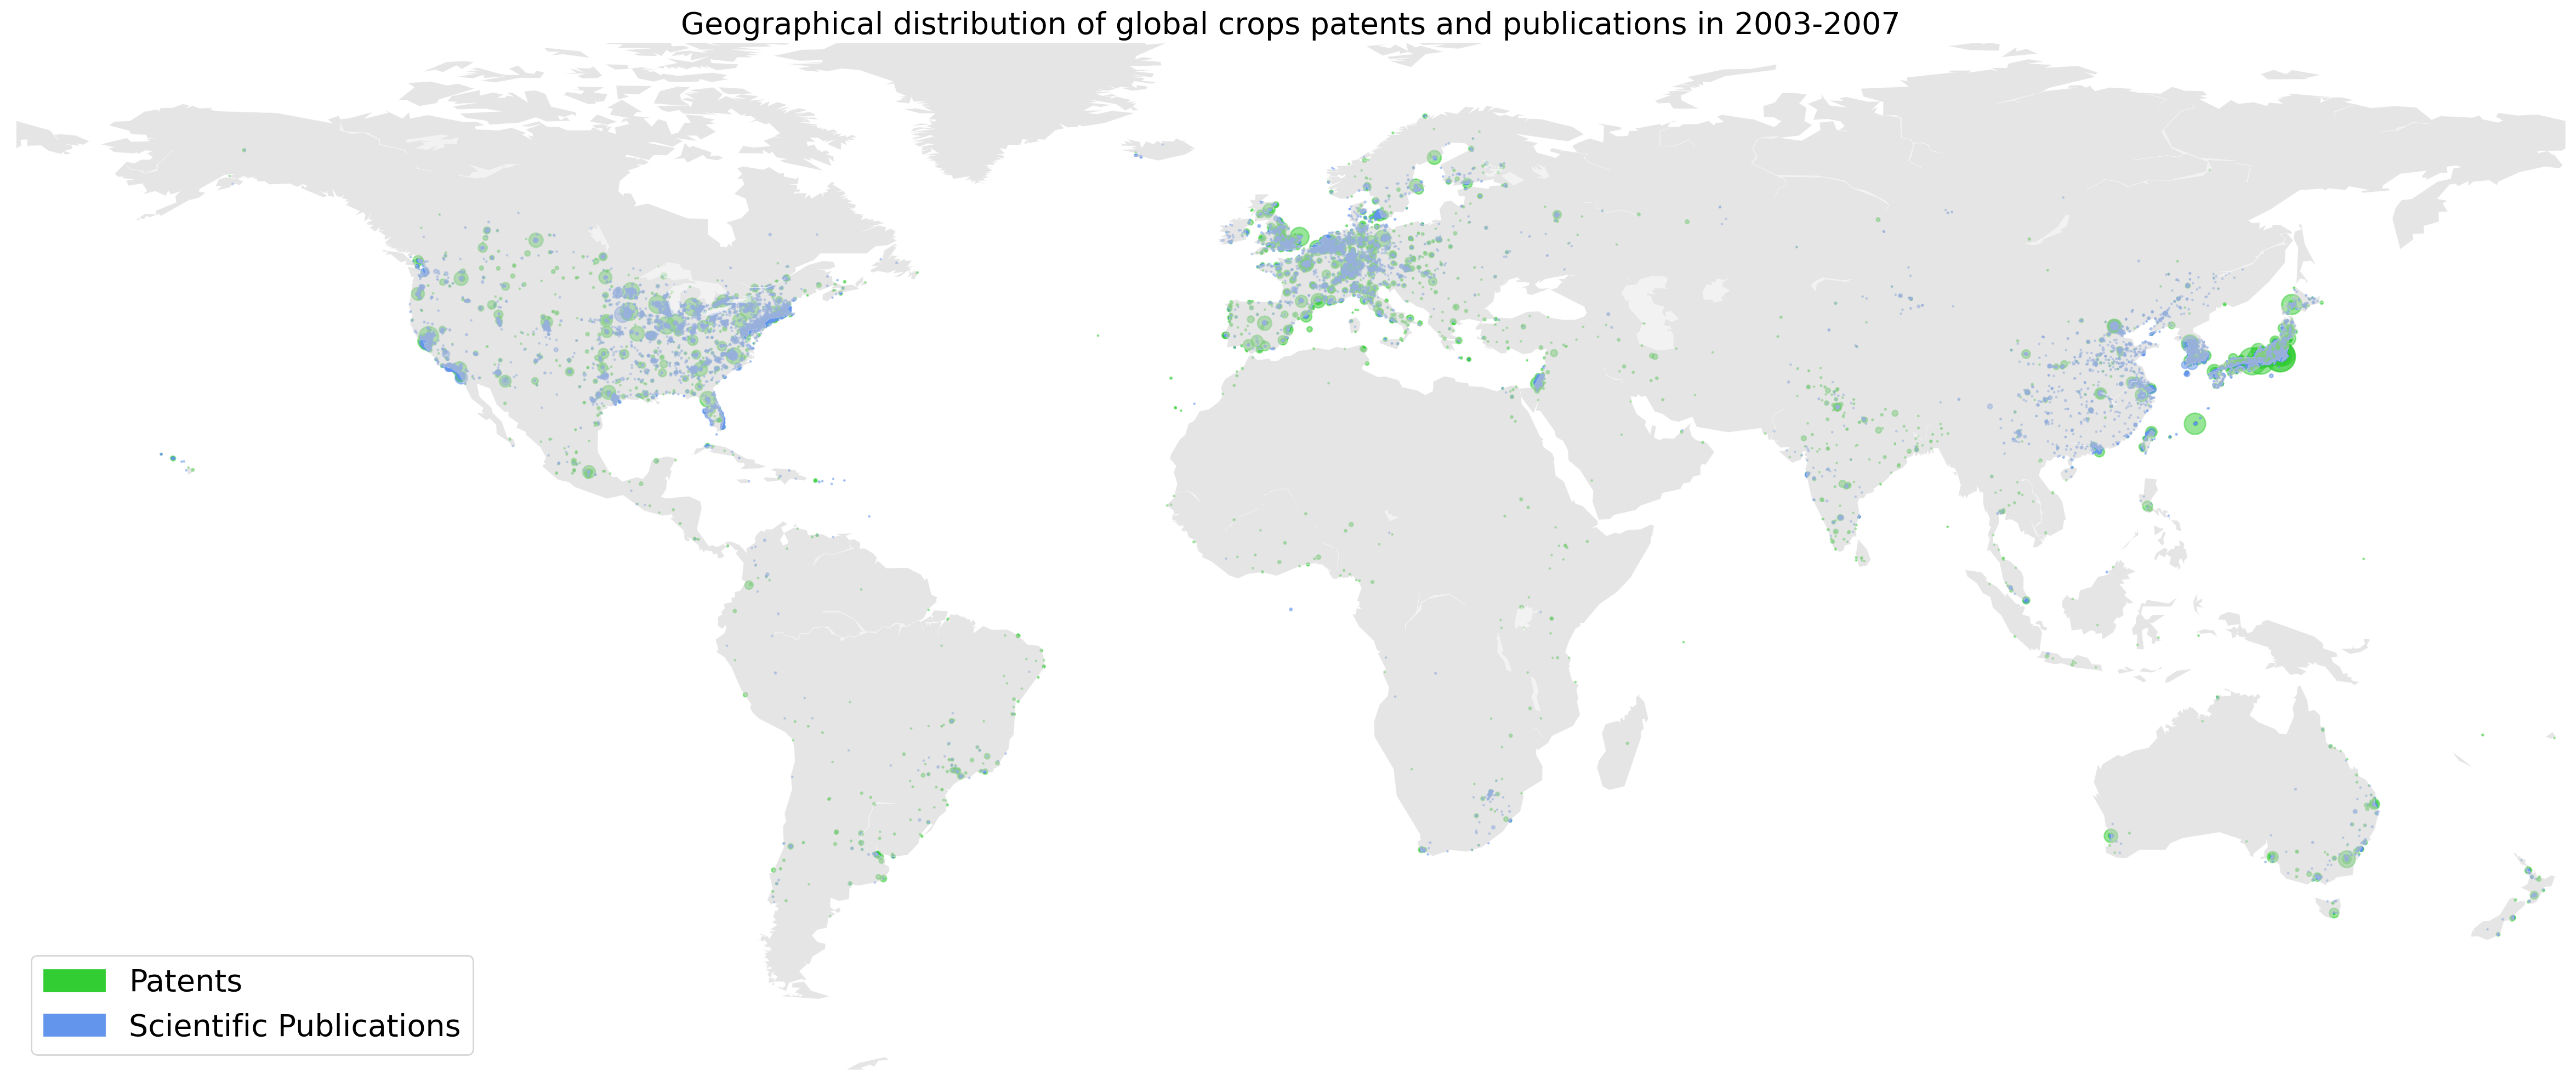

In [4]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline 

def colormap():
    cdict = ['limegreen','cornflowerblue']
    return colors.ListedColormap(cdict, 'indexed')

my_cmap = colormap()

for i in agbio.year_dmy.unique():
    agbio_yeardmy = agbio[agbio.year_dmy==i]
    # Set the dimension of the figure
    my_dpi=200
    plt.figure(figsize=(6000/my_dpi, 4000/my_dpi), dpi=my_dpi)
    
    # Make the background map
    m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
    m.drawmapboundary(fill_color='1', linewidth=0)
    m.fillcontinents(color='0.8', alpha=0.5)
    m.drawcoastlines(linewidth=0.1, color="white")

    # prepare a color for each point depending on the continent.
    # transform categorical to dummy 
    agbio_yeardmy['labels_enc'] = pd.factorize(agbio_yeardmy['pat_wos'])[0]

    # Add a point per position
    m.scatter(agbio_yeardmy['lng'], agbio_yeardmy['lat'], s=agbio_yeardmy['num_points']/2, alpha=0.5, 
              c=agbio_yeardmy['labels_enc'], cmap=my_cmap)

    #create legend
    leg_pat = mpatches.Patch(color='limegreen', label='Patents')
    leg_wos = mpatches.Patch(color='cornflowerblue', label='Scientific Publications')
    plt.legend(handles=[leg_pat,leg_wos],loc='lower left',ncol=1,prop={'size': 20})

    plt.title("Geographical distribution of global crops patents and publications in "+i,size=20)
    # Save as png
    file_dir= 'charts/chart 4.4/'
    file_name= 'chart4.4_crops_'+i
    save_data_charts(file_dir,file_name,agbio_yeardmy,plt)    
    
    print(i,"is finished")

plt.show()

# Chart 4.5 (Static)

Chart 4.5 is a static map displaying the geographical distribution of global Agbio innovation clusters

## Data 

In [6]:
df=pd.read_stata('./charts/chart 4.5/chart 4.5_agbio_cluster_V2.dta')
df=df[df.clus_abmedian==1]
print(df.shape)
df.head()

(287, 7)


id_allclus     asciiname        lat        lng  cluster_type  clusQ  \
0       60001     Melbourne -37.813999  144.96332            61    704   
1       60002      Canberra -35.283459  149.12807            61    373   
2       60003      Adelaide -34.928661  138.59863            61    131   
3       60004  Buenos Aires -34.613152  -58.37723            61     33   
4       60005        Sydney -33.867851  151.20732            61    300   

   clus_abmedian  
0              1  
1              1  
2              1  
3              1  
4              1

## Static maps

saved as:  charts/chart 4.5/chart 4.5_crops_clusters_V2.png


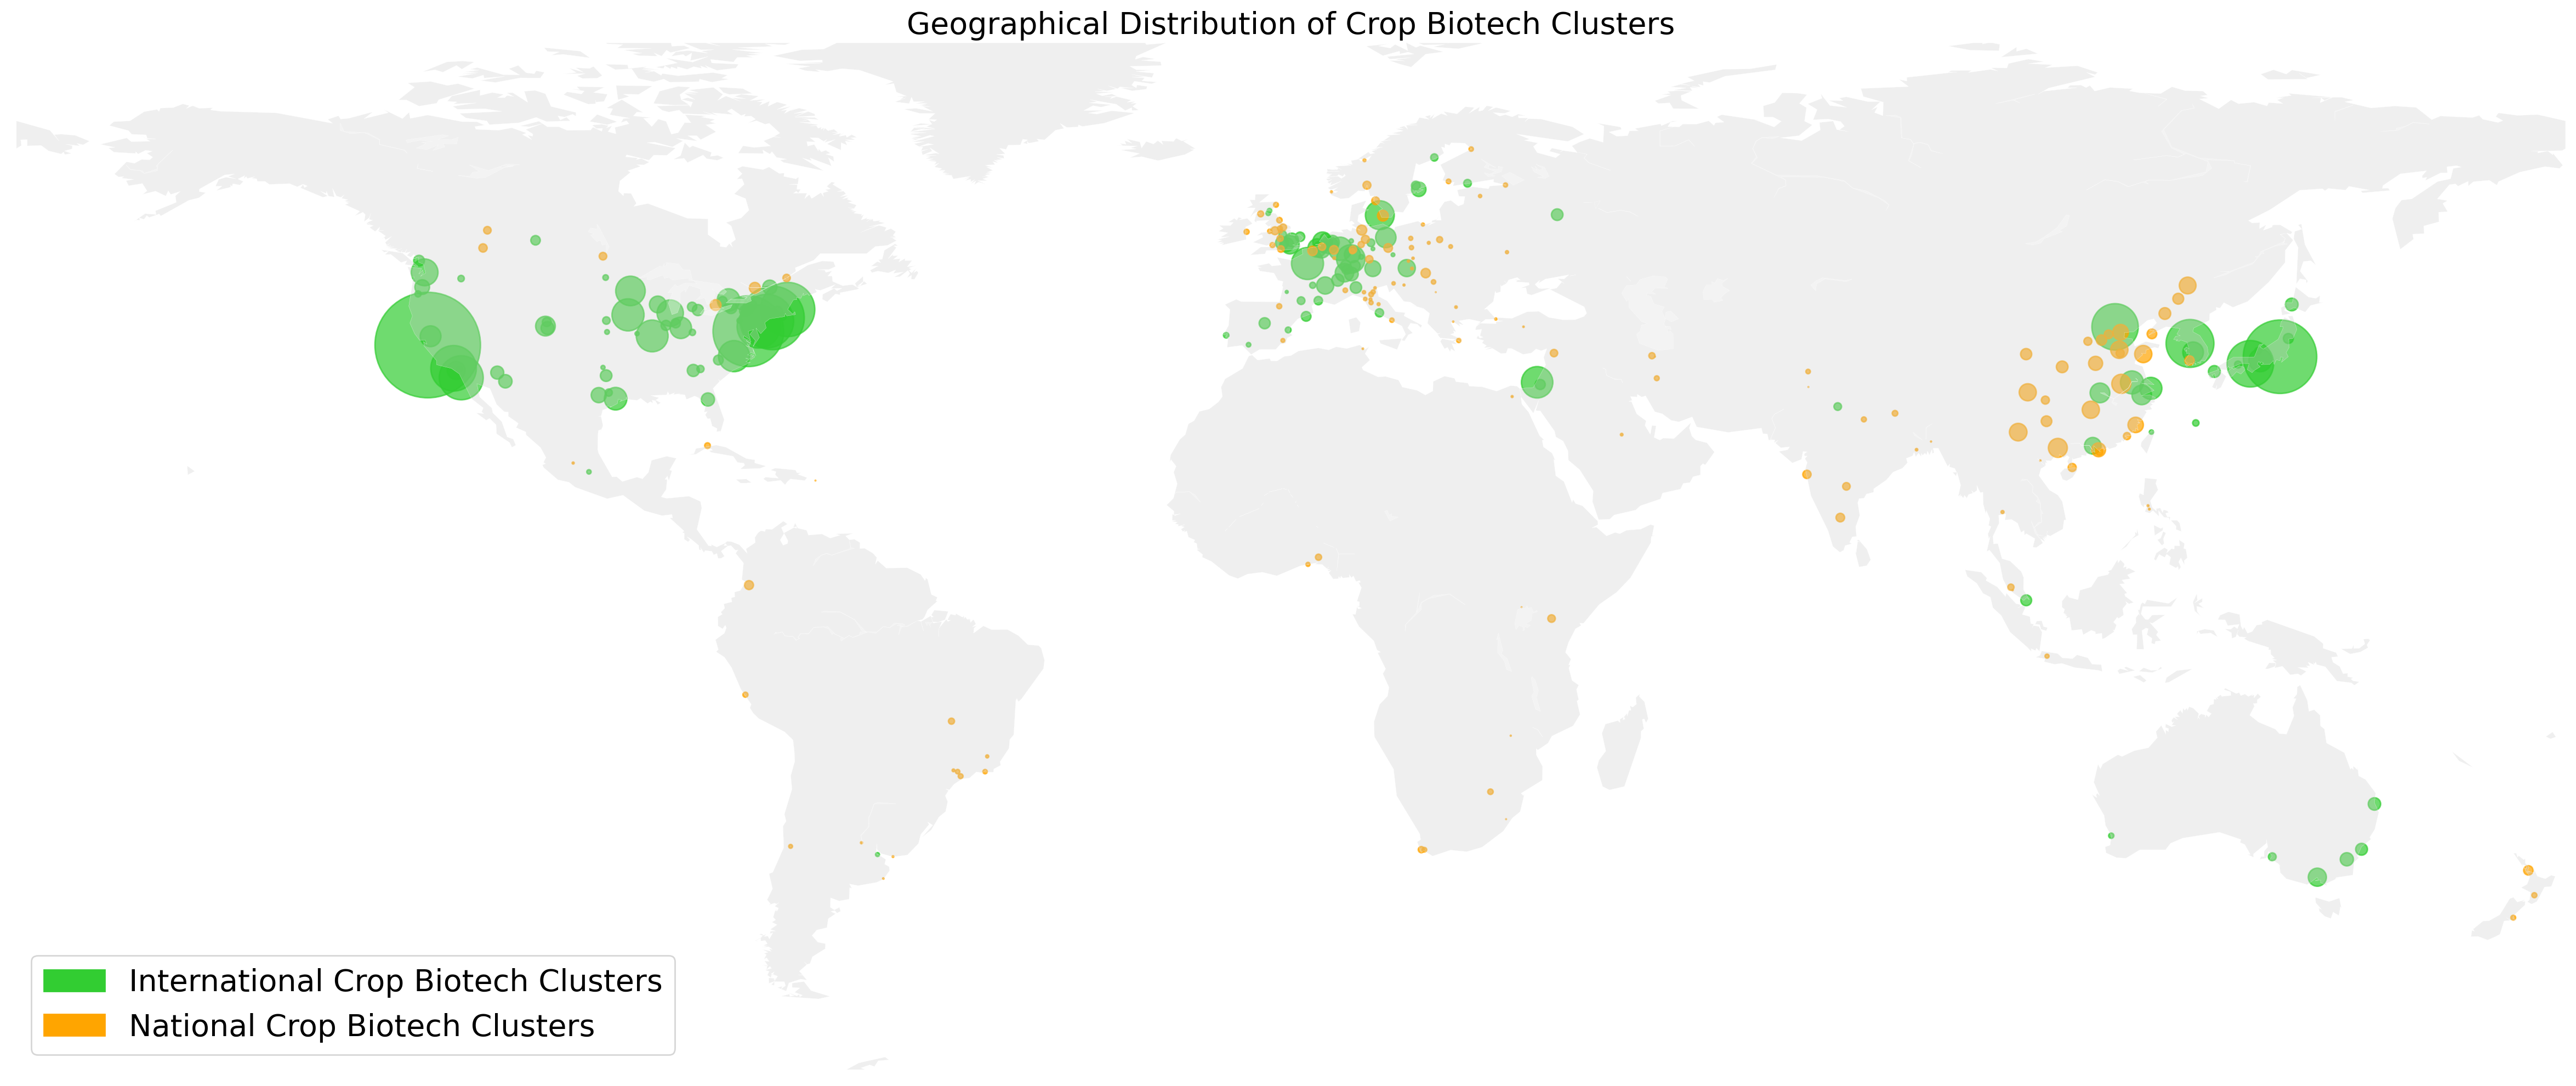

In [7]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline 

def colormap():
    cdict = ['limegreen','orange']
    return colors.ListedColormap(cdict, 'indexed')

my_cmap = colormap()

my_dpi=200
plt.figure(figsize=(6000/my_dpi, 4000/my_dpi), dpi=my_dpi)

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='1', linewidth=0)
m.fillcontinents(color='0.8', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# prepare a color for each point depending on the continent.
# transform categorical to dummy 
df['labels_enc'] = pd.factorize(df['cluster_type'])[0]

# Add a point per position
m.scatter(df['lng'], df['lat'], s=df['clusQ']/5, alpha=0.7, 
          c=df['labels_enc'], cmap=my_cmap)

#create legend
leg_int = mpatches.Patch(color='limegreen', label='International Crop Biotech Clusters')
leg_nat = mpatches.Patch(color='orange', label='National Crop Biotech Clusters')
plt.legend(handles=[leg_int,leg_nat],loc='lower left',ncol=1,prop={'size': 20})

plt.title("Geographical Distribution of Crop Biotech Clusters",size=20)

file_dir= 'charts/chart 4.5/'
file_name= 'chart 4.5_crops_clusters_V2'
save_data_charts(file_dir,file_name,df,plt)

plt.show()

# Interactive maps 

This code generates an interactive maps of global agbio clusters and displays their basic information.

- This interactive maps show the the evolution of global agbio clusters during past two decades. 
- The maps are saved into html format. 
- Please note this is not published in the final report.

## Data

In [13]:
agbio_pat=pd.read_stata('../clusters/agbio_famid_crop_geo.dta')
agbio_pat['year_dmy']=pd.cut(agbio_pat['year'], bins=[1970,1980,1990,2000,2010,2017], 
                             include_lowest=True, labels=['1970s','1980s','1990s','2000s','2010s'])
agbio_pat=agbio_pat.groupby(['addr_id','lat','lng','year_dmy'])['fam_id'].count().reset_index()
agbio_pat.rename(columns={'fam_id':'num_points'},inplace=True)
agbio_pat=agbio_pat[['addr_id', 'lat', 'lng', 'year_dmy','num_points']]
agbio_pat.drop_duplicates(inplace=True)
agbio_pat.head()

addr_id        lat         lng year_dmy  num_points
0       62 -45.903599  170.496002    2000s           1
1       73 -45.895680  170.399246    2000s           1
2       93 -45.884541  170.531525    2000s           1
3      116 -45.878799  170.503006    1990s           1
4      116 -45.878799  170.503006    2000s           1

In [16]:
agbio_wos=pd.read_stata('../clusters/agbio_id_crop_geo.dta')
agbio_wos['year_dmy']=pd.cut(agbio_wos['year'], bins=[2000,2010,2017], 
                             include_lowest=True, labels=['2000s','2010s'])

agbio_wos=agbio_wos.groupby(['latitude','longitude','year_dmy'])['id'].count().reset_index()
agbio_wos.rename(columns={'id':'num_points'},inplace=True)
agbio_wos=agbio_wos[['latitude', 'longitude', 'year_dmy','num_points']]
agbio_wos.drop_duplicates(inplace=True)
agbio_wos.head()

latitude   longitude year_dmy  num_points
0 -54.799999  -68.300003    2010s           3
1 -51.622608  -69.218132    2010s           2
2 -45.878399  170.520096    2010s           1
3 -45.875000  170.347198    2000s           2
4 -45.874199  170.503601    2000s          32

In [6]:
agbio_wos.year_dmy.value_counts()

2010s    6146
2000s    5941
Name: year_dmy, dtype: int64

## Dynamic charts

In [19]:
import folium
from IPython.display import HTML, display

colors=['#BFDFA1','#8C95F9']

for y in agbio_pat.year_dmy.unique():
    crop_map = folium.Map(location=[20,0], zoom_start=2)
    for name, row in agbio_pat.iterrows():    
        if row['year_dmy']==y:            
            folium.CircleMarker(location=[row["lat"], row["lng"]],
                            fill_opacity=0.3,color=colors[0],
                            radius=(row['num_points']+1)/50).add_to(crop_map)
        else:
            pass 
        
    for name, row in agbio_wos.iterrows():    
        if row['year_dmy']==y:            
            folium.CircleMarker(location=[row["latitude"], row["longitude"]],
                            fill_opacity=0.3,color=colors[1],
                            radius=(row['num_points']+1)/50).add_to(crop_map)       
        else:
            pass   

        
    legend_html =   '''
                    <div style="position: fixed; 
                                bottom: 50px; left: 50px; width: 200px; height: 90px; 
                                border:2px solid grey; z-index:9999; font-size:13px;
                                ">&nbsp; Color Legend <br>
                                  &nbsp; Patents &nbsp; <i class="fa fa-circle fa-2x" style="color:{0}"></i><br>
                                  &nbsp; Pulications &nbsp; <i class="fa fa-circle fa-2x" style="color:{1}"></i>
                    </div>
                    '''.format(colors[0],colors[1])

    crop_map.get_root().html.add_child(folium.Element(legend_html))
    map_result="../../Indicators/charts/maps/crops_map_pat_points_int_{}.html".format(y)
    
    crop_map.save(map_result)
    crop_map.save(map_share)
    print(map_result," Has been saved")   


../../charts/dynamic maps/crops_map_pat_points_int_2000s.html  Has been saved 
../../charts/dynamic maps/crops_map_pat_points_int_1990s.html  Has been saved 
../../charts/dynamic maps/crops_map_pat_points_int_2010s.html  Has been saved 
../../charts/dynamic maps/crops_map_pat_points_int_1980s.html  Has been saved 
../../charts/dynamic maps/crops_map_pat_points_int_1970s.html  Has been saved

